In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Load real dataset (Iris)
iris = datasets.load_iris()
X = iris.data[:, :2]  # use first two features for easy visualization
y = iris.target

# Only keep two classes for binary classification (optional for clearer plots)
X = X[y != 2]
y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

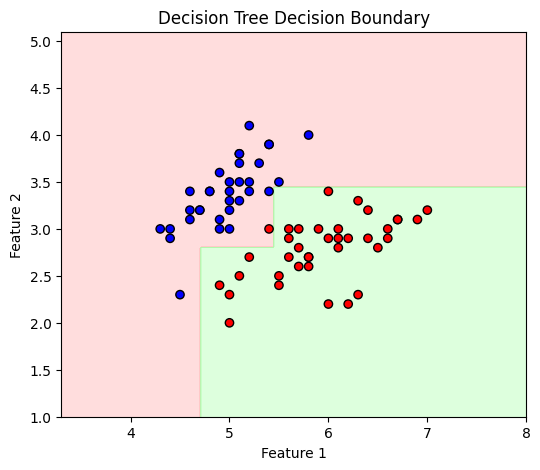

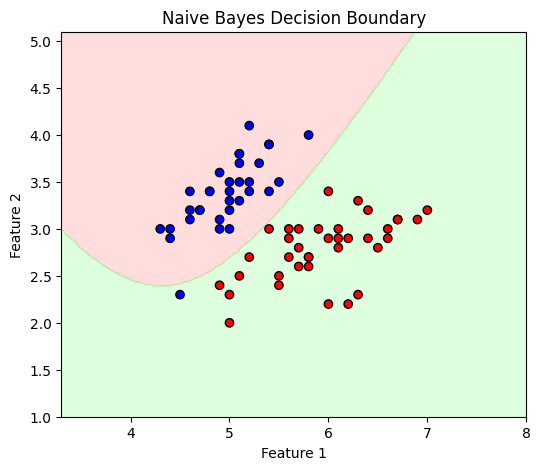

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundaries
plot_decision_boundary(dt, X_train, y_train, "Decision Tree Decision Boundary")
plot_decision_boundary(nb, X_train, y_train, "Naive Bayes Decision Boundary")


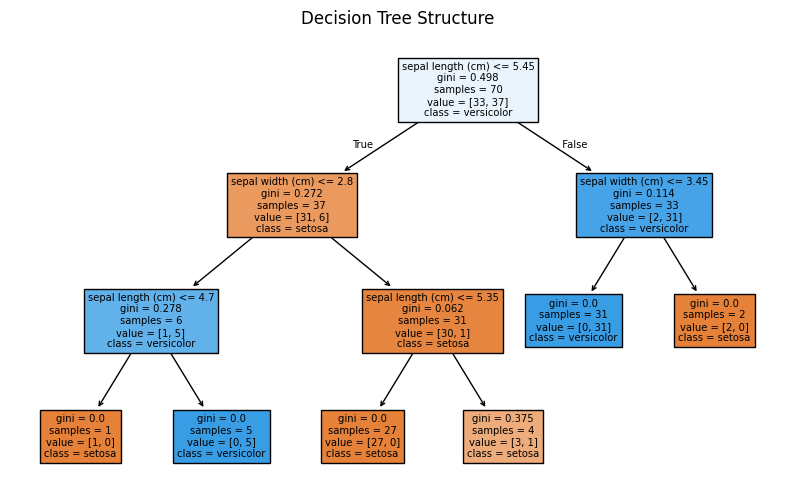

In [ ]:
plt.figure(figsize=(10, 6))
plot_tree(dt, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names[:2])
plt.title("Decision Tree Structure")
plt.show()
